### Import Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from model_scoring import scoring
import pickle
import pandas as pd

### Import Scaler

In [52]:
def load(filename = "scaler.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 

    except FileNotFoundError: 
        print("File not found!")

scaler = load("scaler.pickle")

### Import Cleaned Data

In [3]:
data = pd.read_csv('cleaned_data.csv')
column_names = list(data.columns)

### Create Training Folds

In [57]:
X = data.drop(['Bankrupt?'], axis=1)
Y = data['Bankrupt?']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=.25, random_state=42)

### Train & Test Model

In [60]:
# Create instances of DecisionTreeClassifier
DTC_model = DecisionTreeClassifier()
DTC_Y_pred = DTC_model.fit(X_train, Y_train)

# Make predictions on train and test sets
DTC_train_prediction = DTC_model.predict(X_train)
DTC_test_prediction = DTC_model.predict(X_test)

### Import Scoring func

'The accuracy score of the model is: 0.9542521994134897 '
'The precision score of the model is: 0.34375 '
'The recall score of the model is: 0.3793103448275862 '
'The ROC AUC score of the model is: 0.6769047170403869 '


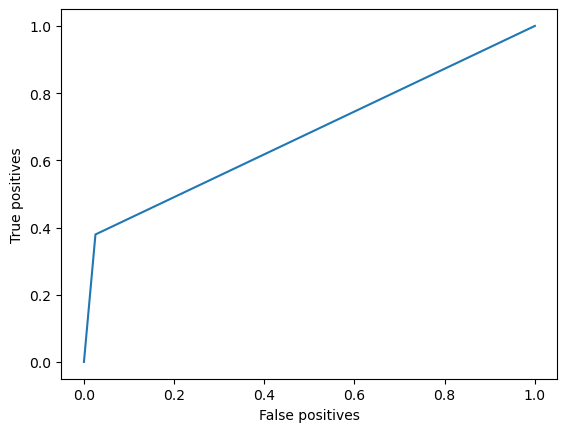

In [65]:
scoring(Y_test, DTC_test_prediction)